<H4>Гудилин Дмитрий РТ5-61 5 варинат

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

In [159]:
data2 = pd.read_csv('C:\\Users\\dimag\\Desktop\\Mash_learning\\RK2\\heart.csv')

In [160]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
#Для кластеризации возьмем возраст и давление, чтобы разбить их по разным группам для дальнейшего исследования 
data = data2.drop(columns=['target','thal','ca','slope','exang','restecg','fbs','oldpeak','thalach','chol','cp','sex'],axis=1)
data.head()

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


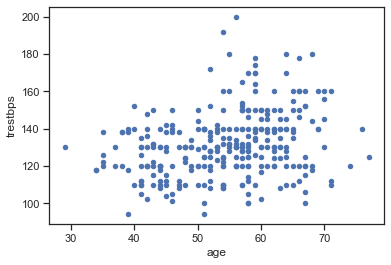

In [162]:
data.reset_index().plot.scatter(x = 'age', y = 'trestbps')

In [163]:
%time 
result_MeanShift = MeanShift(bandwidth=9).fit_predict(data)
result_MeanShift

Wall time: 0 ns


array([1, 0, 0, 2, 2, 1, 1, 2, 4, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 3, 3, 1, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 4, 1, 2, 0, 0, 3, 0, 2, 2,
       4, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 3, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 1, 2, 0, 3, 2, 4, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 4, 1, 0,
       0, 2, 2, 0, 1, 4, 3, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 5, 2, 1, 0, 2, 4, 0, 2, 3, 3, 0, 0, 1, 0, 1, 0, 2, 3, 4,
       1, 1, 0, 0, 0, 3, 5, 1, 1, 0, 1, 2, 3, 1, 0, 1, 1, 2, 4, 2, 0, 2,
       2, 2, 4, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 3, 2, 0, 1, 2, 4, 1, 2, 1, 0, 3, 1, 2, 1,

In [164]:
silhouette_score(data,result_MeanShift)

0.29892111901041046

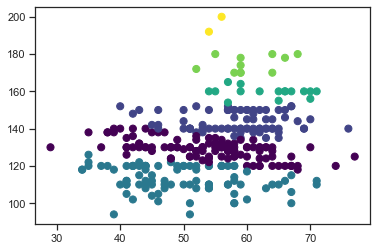

In [165]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=result_MeanShift, s=50, cmap='viridis')

In [175]:
%time 
result_DBSCAN = DBSCAN(eps=3, min_samples=3).fit_predict(data)
result_DBSCAN

Wall time: 0 ns


array([ 0, -1,  1,  1,  1,  1,  1,  1, -1,  0,  1,  1,  1,  2,  0,  1,  1,
        0,  3, -1,  1,  1,  4,  0,  4,  5,  0,  6,  1,  1, -1,  1,  1,  1,
        1,  4,  1,  0, -1,  5,  1,  1, -1,  1,  4,  1,  4,  4,  1,  1,  1,
        1,  1,  6,  1,  1,  1,  6,  1,  1, -1,  6,  1, -1,  1,  4, -1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  6,  1,  7,  0, -1,
       -1,  1, -1,  6,  7,  1,  1,  1,  1,  6,  1,  1,  6,  1,  1,  3, -1,
        1,  1,  1,  1,  5,  4,  1,  6,  9,  0,  1,  6,  1,  1,  1,  1, -1,
        4,  1,  1,  6,  6, -1,  1,  6,  0,  1, -1, -1,  1,  1,  6, -1,  1,
        1,  1,  6,  1,  1,  6,  1, -1, -1, -1,  1,  0,  1,  1,  5, -1, -1,
        0,  4,  1,  1,  1,  1,  1,  1,  1,  1,  4,  4,  5,  1,  1,  1,  1,
        1,  6,  1,  1,  1,  6,  1,  1,  1,  0,  1,  0,  1,  6,  0,  6,  1,
        1,  1,  6,  1,  1,  1,  0,  1,  8,  3,  1,  1,  2,  6,  1,  0,  9,
        5,  1,  6,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,
        1,  1, -1,  6,  0

In [176]:
silhouette_score(data,result_DBSCAN)

0.060672344054623496

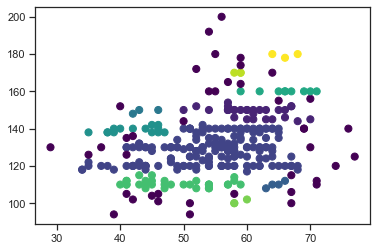

In [177]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=result_DBSCAN, s=50, cmap='viridis')

Можно заметить, что для данных гиперпараметров лучшим будет алгоритм MeanShift